In [1]:
from __future__ import division
#
import os, sys
sys.path.append(os.getcwd()+'/..')
#
import pandas as pd
from scipy import stats
import numpy as np
#
from supports._setting import trips_dir
from supports._setting import DAY_OF_WEEK, TIME_SLOTS, CENT
from supports._setting import DInAP_PInAP, DInAP_POutAP, DOutAP_PInAP, DOutAP_POutAP
from supports.charts import multiple_line_chart
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
whole = pd.read_csv('%s/%s'%(trips_dir, 'whole-ap-tm-num-dur-fare_temp.csv'))
in_ap = whole[(whole['ap-trip-mode'] == DInAP_PInAP) | (whole['ap-trip-mode'] == DOutAP_PInAP)]
out_ap = whole[(whole['ap-trip-mode'] == DInAP_POutAP) | (whole['ap-trip-mode'] == DOutAP_POutAP)]
in_ap_gb = in_ap.groupby(['hh', 'day-of-week'])
out_ap_gb = out_ap.groupby(['hh', 'day-of-week'])

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23]
[55.746, 38.132, 9.192, 4.81, 2.574, 9.545, 35.278, 32.107, 25.234, 24.08, 20.277, 21.591, 28.662, 25.552, 28.581, 35.429, 34.435, 32.626, 36.877, 30.449, 41.738, 40.003, 57.983, 47.664]
[45.218, 25.703, 6.546, 4.412, 4.149, 8.25, 25.478, 24.702, 20.254, 17.864, 15.496, 16.815, 25.726, 22.114, 24.064, 32.558, 29.55, 28.977, 32.33, 28.673, 42.036, 39.318, 58.603, 43.214]
[39.413, 24.807, 6.155, 4.094, 3.505, 8.91, 23.07, 19.902, 17.502, 16.778, 15.221, 18.115, 22.903, 22.509, 25.082, 32.52, 31.634, 30.298, 38.519, 31.769, 50.131, 42.276, 65.331, 48.501]
[40.767, 26.157, 7.063, 4.222, 3.783, 8.097, 26.606, 24.363, 19.404, 17.634, 15.659, 17.725, 25.042, 22.607, 26.669, 33.226, 29.825, 31.165, 39.114, 33.547, 49.013, 43.33, 66.453, 50.337]
[40.103, 28.36, 8.128, 4.28, 2.152, 8.156, 24.852, 20.919, 18.057, 16.035, 14.915, 18.229, 26.44, 26.095, 30.344, 38.486, 35.57, 37.774, 44.136, 37.614, 57.464, 47.10

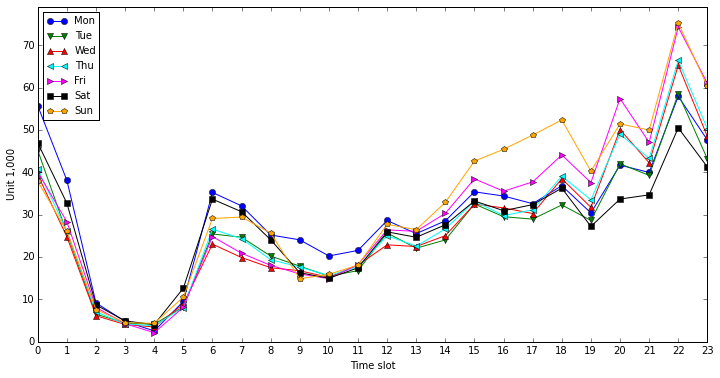

In [3]:
# Total number of in airport trips 
UNIT = 1000
hour_dow_totalNumTrip = in_ap_gb.sum()['num-tm'].to_frame('total-num-trip').reset_index()
xs = range(len(TIME_SLOTS))
yss = [[0]*len(TIME_SLOTS) for _ in DAY_OF_WEEK]
for hour, dow, totalNumTrip in hour_dow_totalNumTrip.values:
    yss[DAY_OF_WEEK.index(dow)][hour] += totalNumTrip / UNIT

print xs
for ys in yss:
    print ys
    
multiple_line_chart((12, 6), '', 'Time slot', 'Unit 1,000', 
                    (xs, 0), yss, DAY_OF_WEEK, 'upper left', 'in_ap_num_trips')

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23]
[1.42495654, 0.97944509, 0.22850078, 0.11886482000000001, 0.06058754, 0.22267979000000002, 0.66397297, 0.77660079, 0.62826903, 0.48983586, 0.36417238, 0.39237127, 0.52394524, 0.46894644, 0.5248090799999999, 0.6482725, 0.65095395, 0.7704214300000001, 0.88917797, 0.69279247, 0.76294577, 0.73456203, 1.0596785800000001, 0.91094505]
[1.1538043500000001, 0.65338298, 0.16033978, 0.10602977000000001, 0.0994224, 0.19337986, 0.4774124, 0.6008301899999999, 0.50580876, 0.36624469, 0.27701874, 0.3041047, 0.46933335, 0.40346109999999996, 0.44097709, 0.59520588, 0.55844085, 0.6907931700000001, 0.78666, 0.65472253, 0.77278787, 0.7198543900000001, 1.07241586, 0.8242099599999999]
[1.0040105400000001, 0.63321956, 0.14835019, 0.09706775, 0.08133824, 0.20697896, 0.42827425, 0.48095828999999996, 0.43259869, 0.34216395, 0.27193698, 0.33013798, 0.41693101, 0.41043644, 0.45756073999999997, 0.59220649, 0.5949244499999999, 0.7

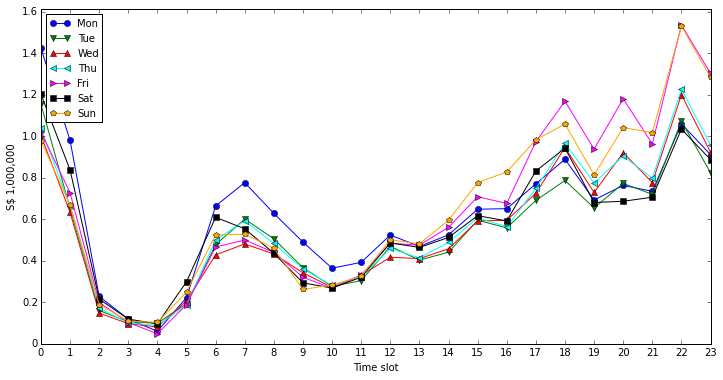

In [4]:
# Total fare of in airport trips
UNIT = 1000000
hour_dow_totalFare = in_ap_gb.sum()['total-fare'].to_frame('total-fare').reset_index()
xs = range(len(TIME_SLOTS))
yss = [[0]*len(TIME_SLOTS) for _ in DAY_OF_WEEK]
for hour, dow, totalFare in hour_dow_totalFare.values:
    yss[DAY_OF_WEEK.index(dow)][hour] += (totalFare / CENT) / UNIT

print xs
for ys in yss:
    print ys
    
multiple_line_chart((12, 6), '', 'Time slot', 'S$ 1,000,000', (xs, 0), yss, DAY_OF_WEEK, 'upper left', 'in_ap_fare')

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23]
[872.768, 582.071, 426.216, 333.165, 298.575, 387.865, 960.062, 1546.893, 2134.074, 2103.492, 1936.043, 1898.218, 2008.757, 2097.095, 2115.319, 1984.042, 1770.593, 1728.352, 1836.996, 1775.318, 2032.922, 1876.408, 1638.517, 1304.954]
[868.12, 619.267, 472.517, 369.281, 301.023, 365.391, 975.034, 1555.554, 2186.346, 2168.599, 1980.871, 1935.286, 2039.01, 2113.873, 2138.054, 1993.336, 1776.102, 1741.985, 1876.476, 1839.782, 2100.825, 1938.42, 1726.927, 1396.428]
[931.915, 654.231, 490.515, 378.24, 307.971, 374.195, 985.551, 1579.571, 2218.415, 2190.655, 1980.506, 1926.9, 2060.832, 2132.293, 2162.2, 2004.469, 1779.212, 1777.84, 1918.919, 1899.616, 2139.716, 2005.783, 1830.57, 1541.679]
[1051.408, 752.332, 591.913, 483.79, 394.757, 408.981, 1012.628, 1616.15, 2267.165, 2233.937, 2027.029, 1978.352, 2100.665, 2180.938, 2201.367, 2043.178, 1815.722, 1820.83, 1954.684, 1945.532, 2182.308, 2027.406, 1845.249

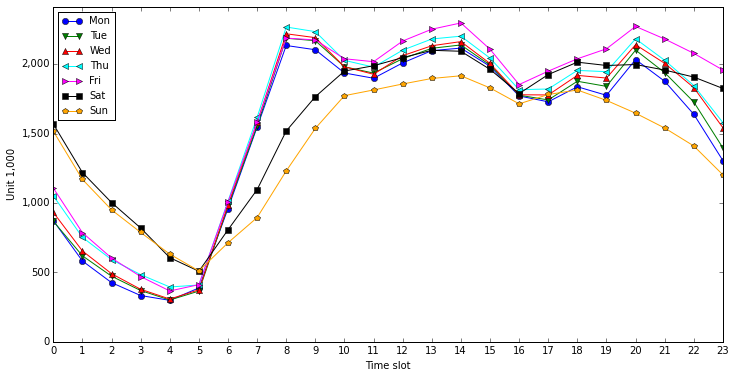

In [5]:
# Total number of out airport trips 
UNIT = 1000
hour_dow_totalNumTrip = out_ap_gb.sum()['num-tm'].to_frame('total-num-trip').reset_index()
xs = range(len(TIME_SLOTS))
yss = [[0]*len(TIME_SLOTS) for _ in DAY_OF_WEEK]
for hour, dow, totalNumTrip in hour_dow_totalNumTrip.values:
    yss[DAY_OF_WEEK.index(dow)][hour] += totalNumTrip / UNIT

print xs
for ys in yss:
    print ys
    
multiple_line_chart((12, 6), '', 'Time slot', 'Unit 1,000', 
                    (xs, 0), yss, DAY_OF_WEEK, 'upper left', 'out_ap_num_trips')

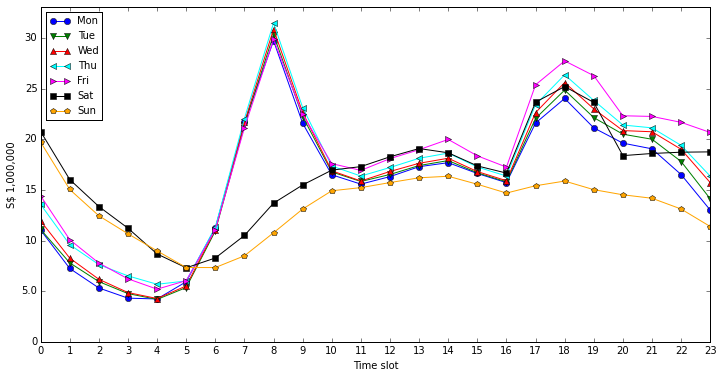

In [7]:
# Total fare of out airport trips
UNIT = 1000000
hour_dow_totalFare = out_ap_gb.sum()['total-fare'].to_frame('total-fare').reset_index()
xs = range(len(TIME_SLOTS))
yss = [[0]*len(TIME_SLOTS) for _ in DAY_OF_WEEK]
for hour, dow, totalFare in hour_dow_totalFare.values:
    yss[DAY_OF_WEEK.index(dow)][hour] += (totalFare / CENT) / UNIT
multiple_line_chart((12, 6), '', 'Time slot', 'S$ 1,000,000', (xs, 0), yss, DAY_OF_WEEK, 'upper left', 'out_ap_fare')